In [21]:
#import necessary library

import pandas as pd
import numpy as np
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
#Get The Stock
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2017-12-17')

#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.737653
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.879066
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013701
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.993060
...,...,...,...,...,...,...
2017-12-11,43.222500,42.197498,42.299999,43.167500,141095200.0,41.540718
2017-12-12,43.097500,42.865002,43.037498,42.924999,77636800.0,41.307350
2017-12-13,43.384998,43.000000,43.125000,43.067501,95273600.0,41.444485


In [3]:
#number of rows and columns
df.shape

(1500, 6)

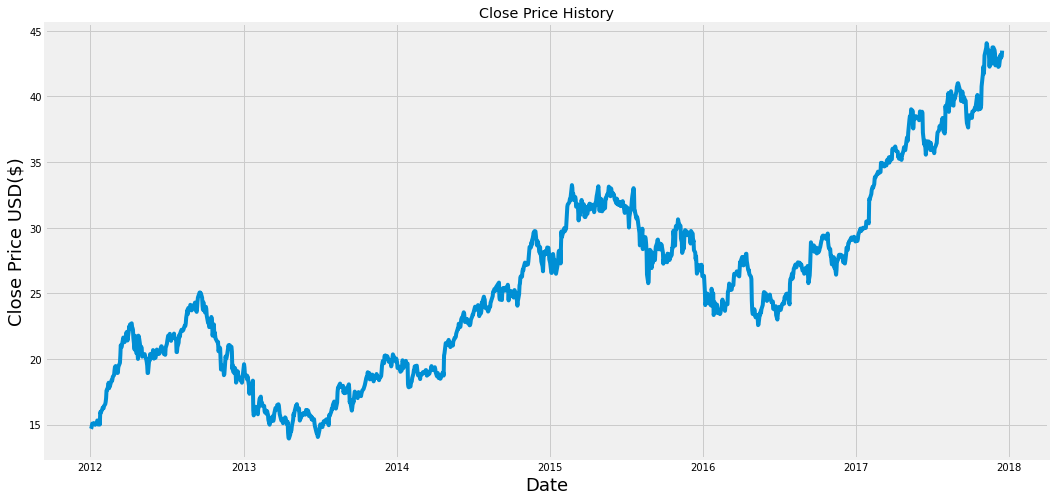

In [4]:
#visualise closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [5]:
#create a new dataframe
data = df.filter(['Close'])

#convert dataframe into a numpy array
dataset = data.values

#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

#print training data
training_data_len

1200

In [6]:
#scale the data
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataset)
scaled_data 

array([[0.02455078],
       [0.02717189],
       [0.03261577],
       ...,
       [0.96704026],
       [0.96662512],
       [0.98115397]])

In [7]:
#create training data set
train_data = scaled_data[0:training_data_len, :]

#split the data
x_train =[]
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.02455078, 0.02717189, 0.03261577, 0.03779872, 0.03700408,
       0.03879498, 0.03797662, 0.03660082, 0.03472689, 0.04052659,
       0.04575698, 0.04414398, 0.03530804, 0.04374072, 0.03543852,
       0.06657177, 0.06416416, 0.06730712, 0.07410305, 0.07821855,
       0.07787461, 0.07660558, 0.08201387, 0.0871019 , 0.09286604,
       0.10217637, 0.12173397, 0.12203047, 0.13291824, 0.14105436,
       0.12707112, 0.13245566, 0.13234893, 0.14744709, 0.14530034,
       0.14927352, 0.15641341, 0.16038665, 0.17183182, 0.18016955,
       0.1825772 , 0.18341932, 0.16916327, 0.16572374, 0.16623376,
       0.17963591, 0.18340747, 0.19150806, 0.21060308, 0.23607898,
       0.23131114, 0.23132298, 0.24974203, 0.25550616, 0.25140244,
       0.24765463, 0.24375259, 0.25671585, 0.26561111, 0.26933523])]
[0.2601316233609075]

[array([0.02455078, 0.02717189, 0.03261577, 0.03779872, 0.03700408,
       0.03879498, 0.03797662, 0.03660082, 0.03472689, 0.04052659,
       0.04575698, 0.04414398, 0.035

In [8]:
#convert x_train and y_train data to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#reshape the data to fit in LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1140, 60, 1)

In [10]:
#Build the LSTM model
model= Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [12]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1140/1140 [==============================] - 27s 22ms/step - loss: 0.0022 - accuracy: 3.2203e-04


In [13]:
#create the testing data set
test_data =scaled_data[training_data_len-60: ,:]

#create the data set x_test, y_test
x_test = []
y_test = dataset[training_data_len: ,:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])
  


In [14]:
#convert test data to numpy array
x_test= np.array(x_test)

In [15]:
#reshape test data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
#get the model predected values
predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions)

In [17]:
#get the root mean squared error
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.0072331237792969

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'lower-right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


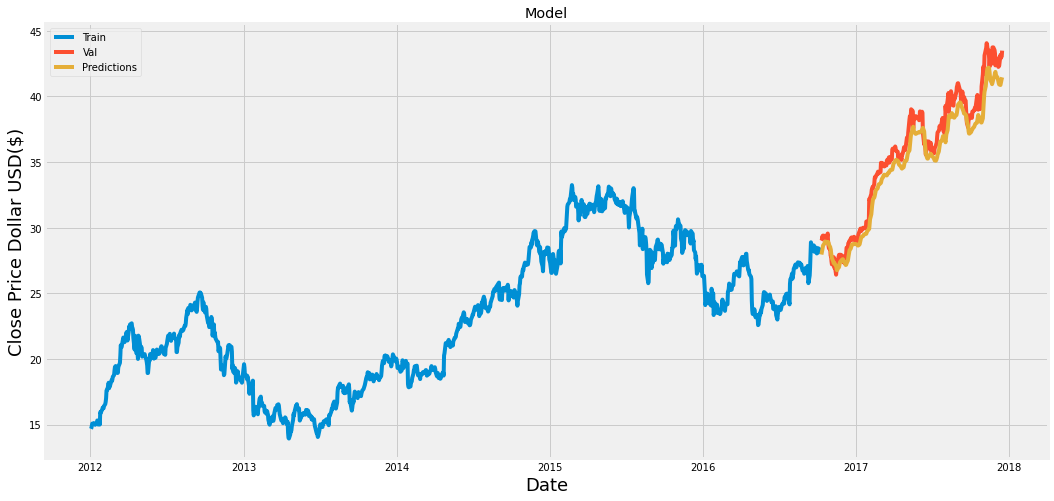

In [18]:
#plot the data
train = data[ :training_data_len]
valid = data [training_data_len: ]
valid['Predictions'] = predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Dollar USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc ='lower-right')
plt.show()

In [19]:
#show the valid and predictions value
valid

,Close,Predictions
Date,,
2016-10-10,29.012501,27.961258
2016-10-11,29.075001,28.121309
2016-10-12,29.334999,28.299463
2016-10-13,29.245001,28.500317
2016-10-14,29.407499,28.656267
...,...,...
2017-12-11,43.167500,40.875019
2017-12-12,42.924999,41.033913
2017-12-13,43.067501,41.186481


In [31]:
#get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

#create a new dataframe
new_df = apple_quote.filter(['Close'])

#get the last 60 days closing price and convert dataframe into numpy array
last_60_days = new_df[-60:].values


#scale the data between 0 and 1
scalar.fit(last_60_days)
last_60_days_scaled =scalar.transform(last_60_days)

#create an empty list
X_test = []

#appned past 60 days data
X_test.append(last_60_days_scaled)

#convert the X_test list to an numpy array
X_test = np.array(X_test)

#reshape the data
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#get the predicted scaled_price
pred_price = model.predict(X_test)

#undo scaling
pred_price =scalar.inverse_transform(pred_price)
print(pred_price)



[[68.3857]]
